In [2]:
import pandas as pd
import numpy as np
import seaborn as se
import matplotlib.pyplot as plt
from bokeh.plotting import figure
from collections import OrderedDict

In [24]:
#path = r"C:\Users\Giorgio\Documents\Data Science\ADM\HW2\Data"

pl = pd.read_json("../dataset/matches/matches_England.json")
df = pd.DataFrame(pl, columns = ['gameweek','label'])
print(df)
df.sort_values(by = ['gameweek'], inplace = True)
df.reset_index(drop = True, inplace = True)
df

     gameweek                                              label
0          38                   Burnley - AFC Bournemouth, 1 - 2
1          38       Crystal Palace - West Bromwich Albion, 2 - 0
2          38                 Huddersfield Town - Arsenal, 0 - 1
3          38          Liverpool - Brighton & Hove Albion, 4 - 0
4          38                 Manchester United - Watford, 1 - 0
5          38                  Newcastle United - Chelsea, 3 - 0
6          38               Southampton - Manchester City, 0 - 1
7          38                   Swansea City - Stoke City, 1 - 2
8          38          Tottenham Hotspur - Leicester City, 5 - 4
9          38                   West Ham United - Everton, 3 - 1
10         31         West Ham United - Manchester United, 0 - 0
11         31    Manchester City - Brighton & Hove Albion, 3 - 1
12         31        Tottenham Hotspur - Newcastle United, 1 - 0
13         31                    Leicester City - Arsenal, 3 - 1
14         35            

,gameweek,label
0,1,"Arsenal - Leicester City, 4 - 3"
1,1,"Manchester United - West Ham United, 4 - 0"
2,1,"Newcastle United - Tottenham Hotspur, 0 - 2"
3,1,"Brighton & Hove Albion - Manchester City, 0 - 2"
4,1,"Chelsea - Burnley, 2 - 3"
5,1,"Watford - Liverpool, 3 - 3"
6,1,"Everton - Stoke City, 1 - 0"
7,1,"Southampton - Swansea City, 0 - 0"
8,1,"West Bromwich Albion - AFC Bournemouth, 1 - 0"
9,1,"Crystal Palace - Huddersfield Town, 0 - 3"


In [25]:
df['team1'] = ''
df['team2'] = ''
df['score1'] = 0
df['score2'] = 0

In [26]:
for i in range(len(df)):
    df['team1'][i] = ((df['label'][i].replace(',', '-')).split('-'))[0].strip()
    df['team2'][i] = ((df['label'][i].replace(',', '-')).split('-'))[1].strip()
    p1 = ((df['label'][i].replace(',', '-')).split('-'))[2].strip()
    p2 = ((df['label'][i].replace(',', '-')).split('-'))[3].strip()
    if(int(p1) > int(p2)):
        df['score1'][i] +=  3
    elif(int(p1) == int(p2)):
        df['score1'][i] += 1
        df['score2'][i] += 1
    else:
        df['score2'][i] += 3


/Users/antonio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/antonio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/antonio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/antonio/anaconda3/l

In [27]:
df.iloc[[1]]

,gameweek,label,team1,team2,score1,score2
1,1,"Manchester United - West Ham United, 4 - 0",Manchester United,West Ham United,3,0


In [28]:
ars = pd.DataFrame(columns = ['gameweek', 'label', 'team1', 'team2', 'score1', 'score2'])
for i in range(len(df)):
    if bool(df.team1[i] == 'Arsenal' or df.team2[i] == 'Arsenal'):
        ars = ars.append(df.iloc[[i]])
ars

,gameweek,label,team1,team2,score1,score2
0,1,"Arsenal - Leicester City, 4 - 3",Arsenal,Leicester City,3,0
13,2,"Stoke City - Arsenal, 1 - 0",Stoke City,Arsenal,3,0
20,3,"Liverpool - Arsenal, 4 - 0",Liverpool,Arsenal,3,0
39,4,"Arsenal - AFC Bournemouth, 3 - 0",Arsenal,AFC Bournemouth,3,0
41,5,"Chelsea - Arsenal, 0 - 0",Chelsea,Arsenal,1,1
51,6,"Arsenal - West Bromwich Albion, 2 - 0",Arsenal,West Bromwich Albion,3,0
66,7,"Arsenal - Brighton & Hove Albion, 2 - 0",Arsenal,Brighton & Hove Albion,3,0
70,8,"Watford - Arsenal, 2 - 1",Watford,Arsenal,3,0
81,9,"Everton - Arsenal, 2 - 5",Everton,Arsenal,0,3
94,10,"Arsenal - Swansea City, 2 - 1",Arsenal,Swansea City,3,0


In [29]:
d = {}
for i in range(len(df)):
    if df.team1[i] not in d:
        d[df.team1[i]] = [int(df.score1[i]),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    else:
        d[df.team1[i]][df.gameweek[i]-1] += df.score1[i] + d[df.team1[i]][df.gameweek[i]-2]
    if df.team2[i] not in d:
        d[df.team2[i]] = [int(df.score2[i]),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    else:
        d[df.team2[i]][df.gameweek[i]-1] += df.score2[i] + d[df.team2[i]][df.gameweek[i]-2]
for elem in d:
    print(elem, d[elem])

Arsenal [3, 3, 3, 6, 7, 10, 13, 13, 16, 19, 19, 22, 25, 28, 28, 29, 30, 33, 34, 37, 38, 39, 39, 42, 42, 45, 45, 45, 45, 48, 48, 51, 54, 54, 57, 57, 60, 63]
Leicester City [0, 3, 3, 3, 4, 4, 5, 6, 9, 12, 13, 13, 14, 17, 20, 23, 26, 26, 27, 27, 27, 30, 31, 34, 34, 35, 35, 36, 37, 40, 43, 46, 46, 46, 47, 47, 47, 47]
Manchester United [3, 6, 9, 10, 13, 16, 19, 20, 20, 23, 23, 26, 29, 32, 35, 35, 38, 41, 42, 43, 44, 47, 50, 53, 53, 56, 56, 59, 62, 65, 66, 69, 72, 72, 75, 78, 78, 81]
West Ham United [0, 0, 0, 3, 4, 4, 7, 8, 8, 9, 9, 9, 10, 10, 10, 13, 14, 17, 17, 18, 19, 22, 25, 26, 27, 27, 30, 30, 30, 30, 31, 34, 35, 36, 36, 36, 39, 42]
Newcastle United [0, 0, 3, 6, 9, 9, 10, 11, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 18, 18, 19, 22, 23, 23, 24, 25, 28, 29, 29, 32, 32, 35, 38, 41, 41, 41, 41, 44]
Tottenham Hotspur [3, 3, 4, 7, 8, 11, 14, 17, 20, 20, 23, 23, 24, 24, 25, 28, 31, 31, 34, 37, 38, 41, 44, 45, 48, 49, 52, 55, 58, 61, 64, 67, 70, 70, 71, 74, 74, 77]
Brighton & Hove Albion [0, 0, 

In [79]:
allsquad = pd.DataFrame(d)
allsquad.index = np.arange(1, len(allsquad)+1)
allsquad

,Arsenal,Leicester City,Manchester United,West Ham United,Newcastle United,Tottenham Hotspur,Brighton & Hove Albion,Manchester City,Chelsea,Burnley,Watford,Liverpool,Everton,Stoke City,Southampton,Swansea City,West Bromwich Albion,AFC Bournemouth,Crystal Palace,Huddersfield Town
1,3,0,3,0,0,3,0,3,0,3,1,1,3,0,1,1,3,0,0,3
2,3,3,6,0,0,3,0,4,3,3,4,4,4,3,4,1,6,0,0,6
3,3,3,9,0,3,4,1,7,6,4,5,7,4,4,5,4,7,0,0,7
4,6,3,10,3,6,7,4,10,9,7,8,7,4,5,5,4,7,0,0,7
5,7,4,13,4,9,8,4,13,10,8,8,8,4,5,8,5,8,3,0,8
6,10,4,16,4,9,11,7,16,13,9,11,11,7,5,8,5,8,3,0,9
7,13,5,19,7,10,14,7,19,13,12,12,12,7,8,8,5,9,4,0,9
8,13,6,20,8,11,17,8,22,13,13,15,13,8,8,9,8,10,4,3,9
9,16,9,20,8,14,20,11,25,16,13,15,13,8,8,12,8,10,7,3,12
10,19,12,23,9,14,20,12,28,19,16,15,16,8,11,13,8,10,7,4,12


In [31]:
streak = OrderedDict()
for elem in d:
    if elem not in streak:
        streak[elem] = [0, 0]   # [win, lose] streak
    current_win = 1
    current_lose = 1
    max_win = 1
    max_lose = 1
    for i in range(1, len(d[elem])):
        if d[elem][i] == d[elem][i-1] + 3:
            current_win += 1
            if current_lose >= max_lose:
                max_lose = current_lose
            current_lose = 0
        elif d[elem][i] == d[elem][i-1]:
            current_lose += 1
            if current_win >= max_win:
                max_win = current_win
            current_win = 0
        else:
            if current_lose >= max_lose:
                max_lose = current_lose
            current_lose = 0
            if current_win >= max_win:
                max_win = current_win
            current_win = 0
        streak[elem][0] = max_win
        streak[elem][1] = max_lose
win_ord = OrderedDict(sorted(streak.items(), key=lambda x:x[1][0]))   # sort by win streak
winner1 = list(win_ord)[-1]
winner2 = list(win_ord)[-2]
lose_ord = OrderedDict(sorted(streak.items(), key=lambda x:x[1][1]))   # sort by win streak
loser1 = list(lose_ord)[-1]
loser2 = list(lose_ord)[-2]

#debug
for elem in streak:
    print(elem, streak[elem])

print(winner1, winner2)
print(loser1, loser2)   

Arsenal [3, 3]
Leicester City [4, 2]
Manchester United [4, 1]
West Ham United [2, 3]
Newcastle United [3, 4]
Tottenham Hotspur [7, 2]
Brighton & Hove Albion [2, 3]
Manchester City [18, 1]
Chelsea [4, 2]
Burnley [3, 3]
Watford [2, 4]
Liverpool [4, 1]
Everton [2, 3]
Stoke City [2, 4]
Southampton [2, 3]
Swansea City [2, 4]
West Bromwich Albion [2, 8]
AFC Bournemouth [2, 4]
Crystal Palace [2, 7]
Huddersfield Town [2, 5]
Manchester City Tottenham Hotspur
West Bromwich Albion Crystal Palace


In [32]:
allsquad[winner1]

1       3
2       4
3       7
4      10
5      13
6      16
7      19
8      22
9      25
10     28
11     31
12     34
13     37
14     40
15     43
16     46
17     49
18     52
19     55
20     58
21     59
22     62
23     62
24     65
25     68
26     69
27     72
28     75
29     78
30     81
31     84
32     87
33     87
34     90
35     93
36     96
37     97
38    100
Name: Manchester City, dtype: int64

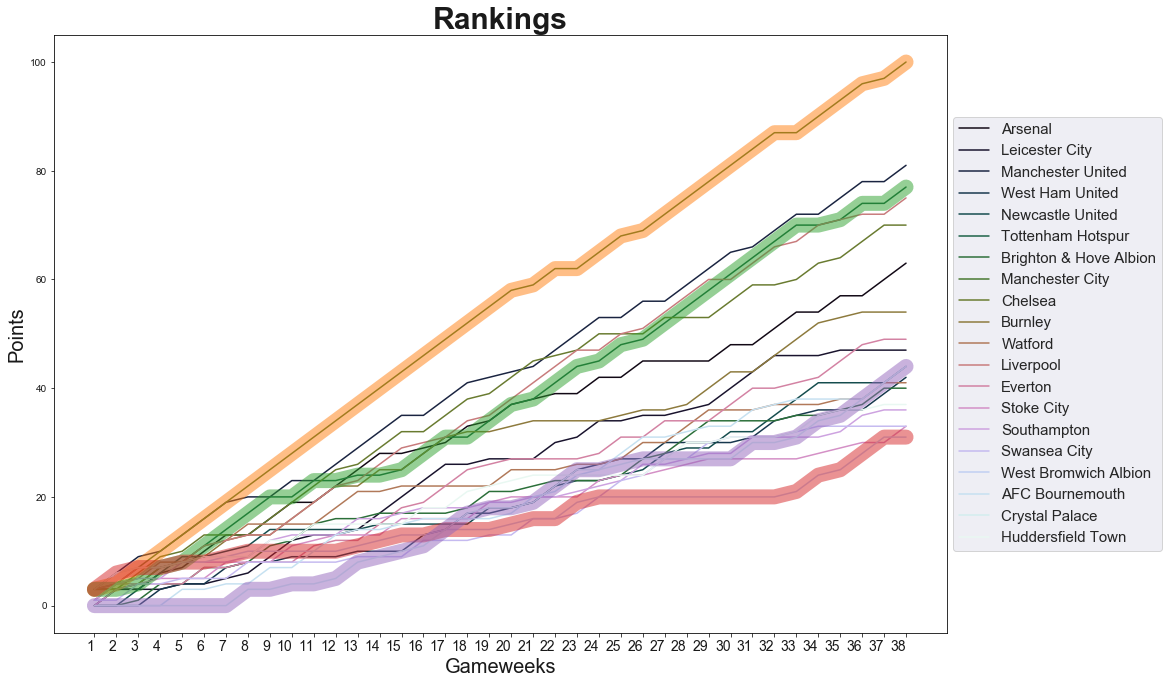

In [33]:
fig, ax = plt.subplots()
se.set(font_scale = 1.5)
fig.set_size_inches(16, 11)
ax.xaxis.grid(False)
ax.set_xticks(list(range(1, 39))) 
ax.set_xticklabels(list(range(1, 39)), fontsize = 14, horizontalalignment='right')
ax.axes.set_title("Rankings", fontsize = 30, fontweight="bold")
ax.set_xlabel("Gameweeks",fontsize = 20)
ax.set_ylabel("Points",fontsize = 20)
x = se.lineplot(data = allsquad, hue = allsquad.columns, ax = ax, legend = 'full', palette = 'cubehelix', style = 'choice', 
                dashes = False, size = 'coherence', sizes=(.25, 2.5))
x.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, fontsize = 15)
# ax.set_xticks([float(n)+0.5 for n in ax.get_xticks()])
plt.plot(allsquad[winner1], marker = '', linewidth = 15, alpha = 0.5)
plt.plot(allsquad[winner2], marker = '', linewidth = 15, alpha=0.5)
plt.plot(allsquad[loser1], marker = '', linewidth = 15, alpha=0.5)
plt.plot(allsquad[loser2], marker = '', linewidth = 15, alpha=0.5)
plt.show(x)

# RQ2

In [34]:
team_1 = "Southampton"
team_2 = "Liverpool"
team_3 = "Chelsea"
team_4 = "Manchester United"
team_5 = "Everton"
dic_t1 = {"win" : [0,0,0], "lose" : [0,0,0], "draw" : [0,0,0], "total" : [0,0,0]}
dic_t2 = {"win" : [0,0,0], "lose" : [0,0,0], "draw" : [0,0,0], "total" : [0,0,0]}
dic_t3 = {"win" : [0,0,0], "lose" : [0,0,0], "draw" : [0,0,0], "total" : [0,0,0]}
dic_t4 = {"win" : [0,0,0], "lose" : [0,0,0], "draw" : [0,0,0], "total" : [0,0,0]}
dic_t5 = {"win" : [0,0,0], "lose" : [0,0,0], "draw" : [0,0,0], "total" : [0,0,0]}
for i in range(len(df)):
    if df.team1[i] == team_1 :
        if df.score1[i] > df.score2[i]:
            dic_t1["win"][0] += 1
            dic_t1["win"][2] += 1
            dic_t1["total"][0] += 1
            dic_t1["total"][2] += 1
        elif df.score1[i] < df.score2[i]:
            dic_t1["lose"][0] += 1
            dic_t1["lose"][2] += 1
            dic_t1["total"][0] += 1
            dic_t1["total"][2] += 1
        else:
            dic_t1["draw"][0] += 1
            dic_t1["draw"][2] += 1
            dic_t1["total"][0] += 1
            dic_t1["total"][2] += 1
    if df.team2[i] == team_1 :
        if df.score1[i] > df.score2[i]:
            dic_t1["win"][1] += 1
            dic_t1["win"][2] += 1
            dic_t1["total"][1] += 1
            dic_t1["total"][2] += 1
        elif df.score1[i] < df.score2[i]:
            dic_t1["lose"][1] += 1
            dic_t1["lose"][2] += 1
            dic_t1["total"][1] += 1
            dic_t1["total"][2] += 1
        else:
            dic_t1["draw"][1] += 1
            dic_t1["draw"][2] += 1
            dic_t1["total"][1] += 1
            dic_t1["total"][2] += 1
    if df.team1[i] == team_2 :
        if df.score1[i] > df.score2[i]:
            dic_t2["win"][0] += 1
            dic_t2["win"][2] += 1
            dic_t2["total"][0] += 1
            dic_t2["total"][2] += 1
        elif df.score1[i] < df.score2[i]:
            dic_t2["lose"][0] += 1
            dic_t2["lose"][2] += 1
            dic_t2["total"][0] += 1
            dic_t2["total"][2] += 1
        else:
            dic_t2["draw"][0] += 1
            dic_t2["draw"][2] += 1
            dic_t2["total"][0] += 1
            dic_t2["total"][2] += 1
    if df.team2[i] == team_2 :
        if df.score1[i] > df.score2[i]:
            dic_t2["win"][1] += 1
            dic_t2["win"][2] += 1
            dic_t2["total"][1] += 1
            dic_t2["total"][2] += 1
        elif df.score1[i] < df.score2[i]:
            dic_t2["lose"][1] += 1
            dic_t2["lose"][2] += 1
            dic_t2["total"][1] += 1
            dic_t2["total"][2] += 1
        else:
            dic_t2["draw"][1] += 1
            dic_t2["draw"][2] += 1
            dic_t2["total"][1] += 1
            dic_t2["total"][2] += 1
    if df.team1[i] == team_3 :
        if df.score1[i] > df.score2[i]:
            dic_t3["win"][0] += 1
            dic_t3["win"][2] += 1
            dic_t3["total"][0] += 1
            dic_t3["total"][2] += 1
        elif df.score1[i] < df.score2[i]:
            dic_t3["lose"][0] += 1
            dic_t3["lose"][2] += 1
            dic_t3["total"][0] += 1
            dic_t3["total"][2] += 1
        else:
            dic_t3["draw"][0] += 1
            dic_t3["draw"][2] += 1
            dic_t3["total"][0] += 1
            dic_t3["total"][2] += 1
    if df.team2[i] == team_3 :
        if df.score1[i] > df.score2[i]:
            dic_t3["win"][1] += 1
            dic_t3["win"][2] += 1
            dic_t3["total"][1] += 1
            dic_t3["total"][2] += 1
        elif df.score1[i] < df.score2[i]:
            dic_t3["lose"][1] += 1
            dic_t3["lose"][2] += 1
            dic_t3["total"][1] += 1
            dic_t3["total"][2] += 1
        else:
            dic_t3["draw"][1] += 1
            dic_t3["draw"][2] += 1
            dic_t3["total"][1] += 1
            dic_t3["total"][2] += 1
    if df.team1[i] == team_4 :
        if df.score1[i] > df.score2[i]:
            dic_t4["win"][0] += 1
            dic_t4["win"][2] += 1
            dic_t4["total"][0] += 1
            dic_t4["total"][2] += 1
        elif df.score1[i] < df.score2[i]:
            dic_t4["lose"][0] += 1
            dic_t4["lose"][2] += 1
            dic_t4["total"][0] += 1
            dic_t4["total"][2] += 1
        else:
            dic_t4["draw"][0] += 1
            dic_t4["draw"][2] += 1
            dic_t4["total"][0] += 1
            dic_t4["total"][2] += 1
    if df.team2[i] == team_4 :
        if df.score1[i] > df.score2[i]:
            dic_t4["win"][1] += 1
            dic_t4["win"][2] += 1
            dic_t4["total"][1] += 1
            dic_t4["total"][2] += 1
        elif df.score1[i] < df.score2[i]:
            dic_t4["lose"][1] += 1
            dic_t4["lose"][2] += 1
            dic_t4["total"][1] += 1
            dic_t4["total"][2] += 1
        else:
            dic_t4["draw"][1] += 1
            dic_t4["draw"][2] += 1
            dic_t4["total"][1] += 1
            dic_t4["total"][2] += 1
    if df.team1[i] == team_5 :
        if df.score1[i] > df.score2[i]:
            dic_t5["win"][0] += 1
            dic_t5["win"][2] += 1
            dic_t5["total"][0] += 1
            dic_t5["total"][2] += 1
        elif df.score1[i] < df.score2[i]:
            dic_t5["lose"][0] += 1
            dic_t5["lose"][2] += 1
            dic_t5["total"][0] += 1
            dic_t5["total"][2] += 1
        else:
            dic_t5["draw"][0] += 1
            dic_t5["draw"][2] += 1
            dic_t5["total"][0] += 1
            dic_t5["total"][2] += 1
    if df.team2[i] == team_5 :
        if df.score1[i] > df.score2[i]:
            dic_t5["win"][1] += 1
            dic_t5["win"][2] += 1
            dic_t5["total"][1] += 1
            dic_t5["total"][2] += 1
        elif df.score1[i] < df.score2[i]:
            dic_t5["lose"][1] += 1
            dic_t5["lose"][2] += 1
            dic_t5["total"][1] += 1
            dic_t5["total"][2] += 1
        else:
            dic_t5["draw"][1] += 1
            dic_t5["draw"][2] += 1
            dic_t5["total"][1] += 1
            dic_t5["total"][2] += 1

cont_table_t1 = pd.DataFrame(dic_t1)
cont_table_t2 = pd.DataFrame(dic_t2)
cont_table_t3 = pd.DataFrame(dic_t3)
cont_table_t4 = pd.DataFrame(dic_t4)
cont_table_t5 = pd.DataFrame(dic_t5)
#cont_table_t1
#cont_table_t2
#cont_table_t3
#cont_table_t4
cont_table_t5

,win,lose,draw,total
0,10,5,4,19
1,10,3,6,19
2,20,8,10,38


   # RQ 3

In [309]:
coaches = pd.read_json('../dataset/coaches.json')
teams = pd.read_json('../dataset/teams.json', orient = 'record')
coach_teams_orig = pd.merge(coaches, teams, left_on="currentTeamId", right_on="wyId")
coach_teams = pd.DataFrame(coach_teams_orig, columns=["birthDate", "firstName", "lastName", "shortName", "currentTeamId", "name", "officialName"])

In [310]:
#we need premier league coach only
coach_teams_en = coach_teams[coach_teams.name.isin(allsquad.columns) | coach_teams.officialName.isin(allsquad.columns)]

In [311]:
# TODO: move in functions.py
from datetime import date 
  
def calculateAge(birthdate): 
    birthdate_arr = birthdate.split("-")
    today = date.today()
    if str(birthdate_arr[1])+str(birthdate_arr[2]) > str(today.month)+str(today.day): 
        return int(int(today.year) - int(birthdate_arr[0]) - 1)
    else: 
        return int(int(today.year) - int(birthdate_arr[0]))

In [316]:
#add age column
coach_teams_en = coach_teams_en.assign(age = coach_teams_en["birthDate"].apply(calculateAge))
coach_teams_en

,birthDate,firstName,lastName,shortName,currentTeamId,teamName,officialTeamName,age
22,1977-11-29,Eddie,Howe,E. Howe,1659,AFC Bournemouth,AFC Bournemouth,41
61,1977-07-12,Marco Alexandre,Saraiva da Silva,Marco Silva,1623,Everton,Everton FC,42
14,1973-02-19,Francisco,de Míguel Moreno,Paco,1613,Newcastle United,Newcastle United FC,46
21,1971-11-03,Unai,Emery Etxegoien,Unai Emery,1609,Arsenal,Arsenal FC,47
31,1972-03-02,Mauricio Roberto,Pochettino Trossero,M. Pochettino,1624,Tottenham Hotspur,Tottenham Hotspur FC,47
28,1971-06-28,Sean,Dyche,S. Dyche,1646,Burnley,Burnley FC,48
59,1971-01-18,Josep,Guardiola i Sala,Guardiola,1625,Manchester City,Manchester City FC,48
54,1970-05-01,Javier,Gracia Carlos,Javi Gracia,1644,Watford,Watford FC,49
15,1967-08-09,Ralph,Hasenhüttl,R. Hasenhüttl,1619,Southampton,Southampton FC,52
19,1967-06-16,Jürgen,Klopp,J. Klopp,1612,Liverpool,Liverpool FC,52


In [317]:
#rename columns and sort the dataframe by age
coach_teams_en.rename(columns={"name" : "teamName", "officialName" : "officialTeamName"}, inplace = True)
coach_teams_en.sort_values(by= ["age"], inplace = True)

In [319]:
# there are two coaches of the same team, we take the youngest
coach_teams_en.drop_duplicates(subset = "currentTeamId", keep="first", inplace = True )

Text(0,0.5,'age')

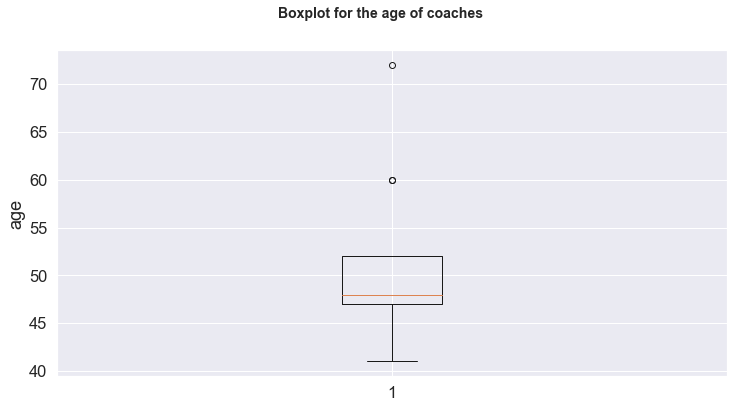

In [320]:
#box plot
fig = plt.figure()
fig.suptitle('Boxplot for the age of coaches', fontsize=14, fontweight='bold')
fig.set_size_inches(12,6)
ax = fig.add_subplot(111)
ax.boxplot(coach_teams_en["age"])
ax.set_ylabel('age')

In [321]:
print("The 10 youngest coaches\n")
yougest_coaches_en = coach_teams_en[:10]
for index, el in yougest_coaches_en.iterrows():
    print( el["firstName"], el["lastName"], "\nage:", el["age"], "\t team:", el["teamName"],"\n")

The 10 youngest coaches

Eddie Howe 
age: 41 	 team: AFC Bournemouth 

Marco Alexandre Saraiva da Silva 
age: 42 	 team: Everton 

Francisco de Míguel Moreno 
age: 46 	 team: Newcastle United 

Unai Emery Etxegoien 
age: 47 	 team: Arsenal 

Mauricio Roberto Pochettino Trossero 
age: 47 	 team: Tottenham Hotspur 

Sean Dyche 
age: 48 	 team: Burnley 

Josep  Guardiola i Sala 
age: 48 	 team: Manchester City 

Javier Gracia Carlos 
age: 49 	 team: Watford 

Ralph Hasenhüttl 
age: 52 	 team: Southampton 

Jürgen Klopp 
age: 52 	 team: Liverpool 



## RQ5

In [331]:
players = pd.read_json('../dataset/players.json')
events = pd.read_json('../dataset/events/events_England.json')
interest_event = "Air duel"

In [348]:
air_duels =events[events["subEventName"] == interest_event]
air_duels

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
7,1,Duel,14.765321,177959189,2499719,1H,8013,"[{'y': 15, 'x': 39}, {'y': 20, 'x': 33}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",1631
8,1,Duel,14.765321,177961218,2499719,1H,0,"[{'y': 85, 'x': 61}, {'y': 80, 'x': 67}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1609
12,1,Duel,21.878309,177959191,2499719,1H,8653,"[{'y': 46, 'x': 29}, {'y': 41, 'x': 50}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1631
13,1,Duel,22.551816,177959181,2499719,1H,25413,"[{'y': 54, 'x': 71}, {'y': 59, 'x': 50}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",1609
27,1,Duel,47.717508,177959210,2499719,1H,192748,"[{'y': 56, 'x': 60}, {'y': 49, 'x': 56}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1631
28,1,Duel,48.265872,177959188,2499719,1H,7945,"[{'y': 44, 'x': 40}, {'y': 51, 'x': 44}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",1609
60,1,Duel,178.239539,177959246,2499719,1H,8488,"[{'y': 41, 'x': 93}, {'y': 52, 'x': 85}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",1631
61,1,Duel,178.317724,177959224,2499719,1H,120339,"[{'y': 59, 'x': 7}, {'y': 48, 'x': 15}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1609
89,1,Duel,253.893086,177959248,2499719,1H,49876,"[{'y': 48, 'x': 4}, {'y': 48, 'x': 4}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",1609
90,1,Duel,254.036308,177959279,2499719,1H,14763,"[{'y': 52, 'x': 96}, {'y': 52, 'x': 96}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1631


In [356]:
air_duels = air_duels.assign(won_duel = air_duels["tags"].apply(won_duel))

In [352]:
def won_duel(tags):
    for el in tags:
        if el['id'] == 1801:
            return True
    return False

In [357]:
air_duels

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId,won_duel
7,1,Duel,14.765321,177959189,2499719,1H,8013,"[{'y': 15, 'x': 39}, {'y': 20, 'x': 33}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",1631,False
8,1,Duel,14.765321,177961218,2499719,1H,0,"[{'y': 85, 'x': 61}, {'y': 80, 'x': 67}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1609,True
12,1,Duel,21.878309,177959191,2499719,1H,8653,"[{'y': 46, 'x': 29}, {'y': 41, 'x': 50}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1631,True
13,1,Duel,22.551816,177959181,2499719,1H,25413,"[{'y': 54, 'x': 71}, {'y': 59, 'x': 50}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",1609,False
27,1,Duel,47.717508,177959210,2499719,1H,192748,"[{'y': 56, 'x': 60}, {'y': 49, 'x': 56}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1631,True
28,1,Duel,48.265872,177959188,2499719,1H,7945,"[{'y': 44, 'x': 40}, {'y': 51, 'x': 44}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",1609,False
60,1,Duel,178.239539,177959246,2499719,1H,8488,"[{'y': 41, 'x': 93}, {'y': 52, 'x': 85}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",1631,False
61,1,Duel,178.317724,177959224,2499719,1H,120339,"[{'y': 59, 'x': 7}, {'y': 48, 'x': 15}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1609,True
89,1,Duel,253.893086,177959248,2499719,1H,49876,"[{'y': 48, 'x': 4}, {'y': 48, 'x': 4}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",1609,False
90,1,Duel,254.036308,177959279,2499719,1H,14763,"[{'y': 52, 'x': 96}, {'y': 52, 'x': 96}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1631,True
